# ทดสอบการสร้างโมเดล regression machine learning จากข้อมูล 120 km
* simple linear
* multiple linear
* polynomial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## read & data cleansing

In [2]:
df = pd.read_csv('./00Results/df_org_dbz_rain_test120km_full_features.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.dropna(inplace=True)
df.drop(df[df['rain_truth'] <= 0.1].index, inplace = True) # ทดสอบการตัดฝนอ่อนตรงนี้้ได 0, 0.5,1.0
df.drop(df[df['dBZ_c4'] < 10].index, inplace = True) #ฝนอ่่อนมากๆ < 10 dBZ
df.drop(df[df['dBZ_c4'] > 55].index, inplace = True) #ค่าการสะท้อนที่อาจเป็นลูกเห็บ 55 dBZ
df.reset_index(drop=True, inplace=True)

In [3]:
df

,dBZ_c1,dBZ_c2,dBZ_c3,dBZ_c4,rain_intensity,rain_truth
0,18.245508,17.964867,17.979790,18.295288,Heavy,10.8
1,25.722824,25.153559,25.436876,25.657282,Slight,0.4
2,44.015987,40.230587,39.639973,38.263885,Slight,0.2
3,27.682062,26.767149,25.615660,24.295784,Slight,0.2
4,26.207233,26.207233,26.207233,26.207232,Slight,0.2
...,...,...,...,...,...,...
3586,25.825758,26.728218,27.518534,28.241079,Slight,0.2
3587,42.183460,42.041981,41.005638,38.473560,Slight,2.4
3588,28.382376,28.203165,27.679672,26.672712,Slight,0.2
3589,25.915712,25.959574,25.933939,25.477449,Heavy,24.8


In [4]:
#df_ = df.drop(df.loc[:, 'rr_MP_c1':'rr_SC_p4'].columns, axis=1) #ลบคอลัมน์
#df_

## Data visualization 

### correlation matrix

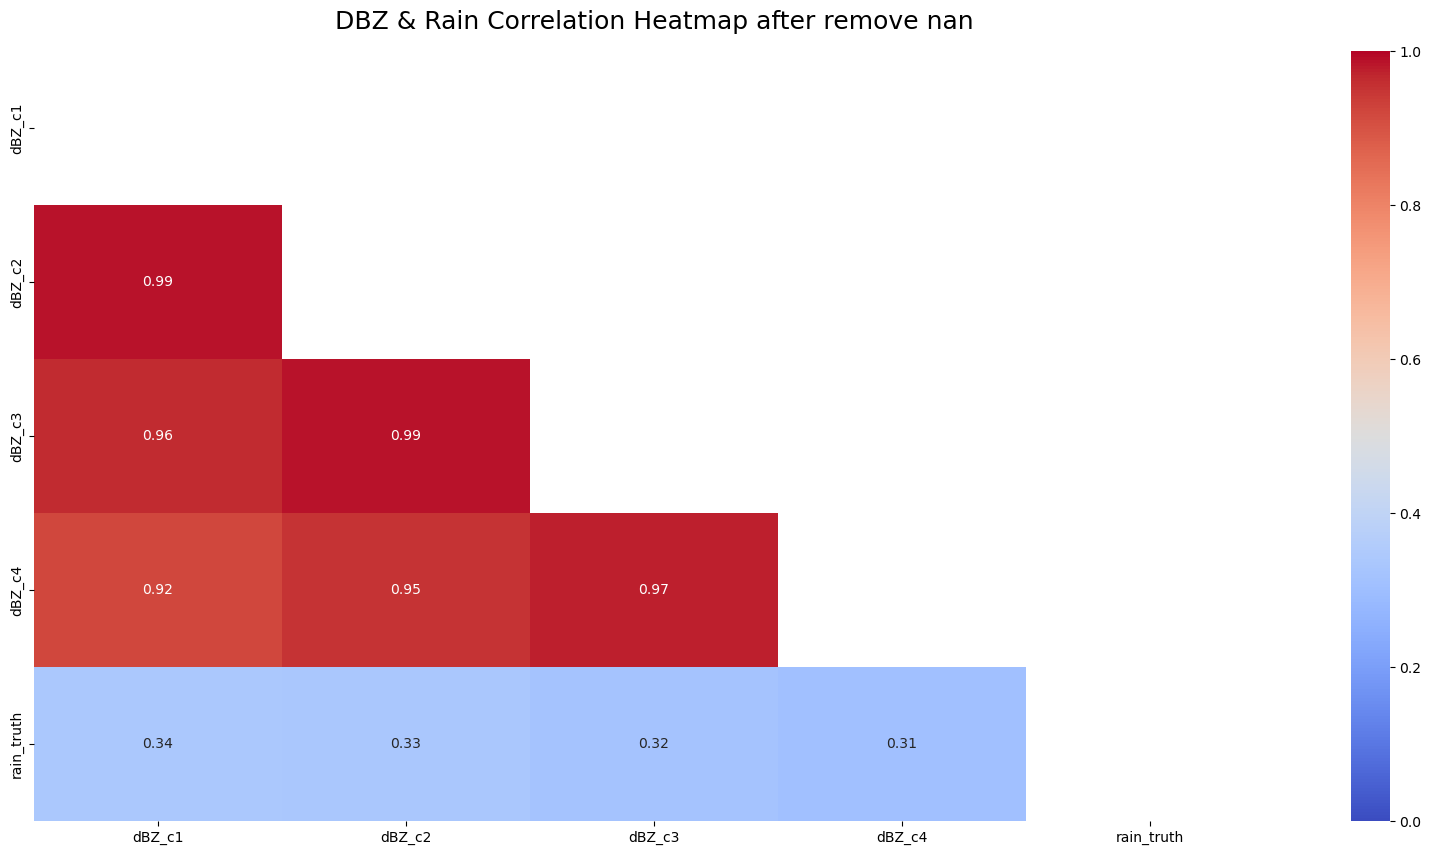

In [5]:
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('DBZ & Rain Correlation Heatmap after remove nan', fontdict={'fontsize':18}, pad=16);

### pair plot

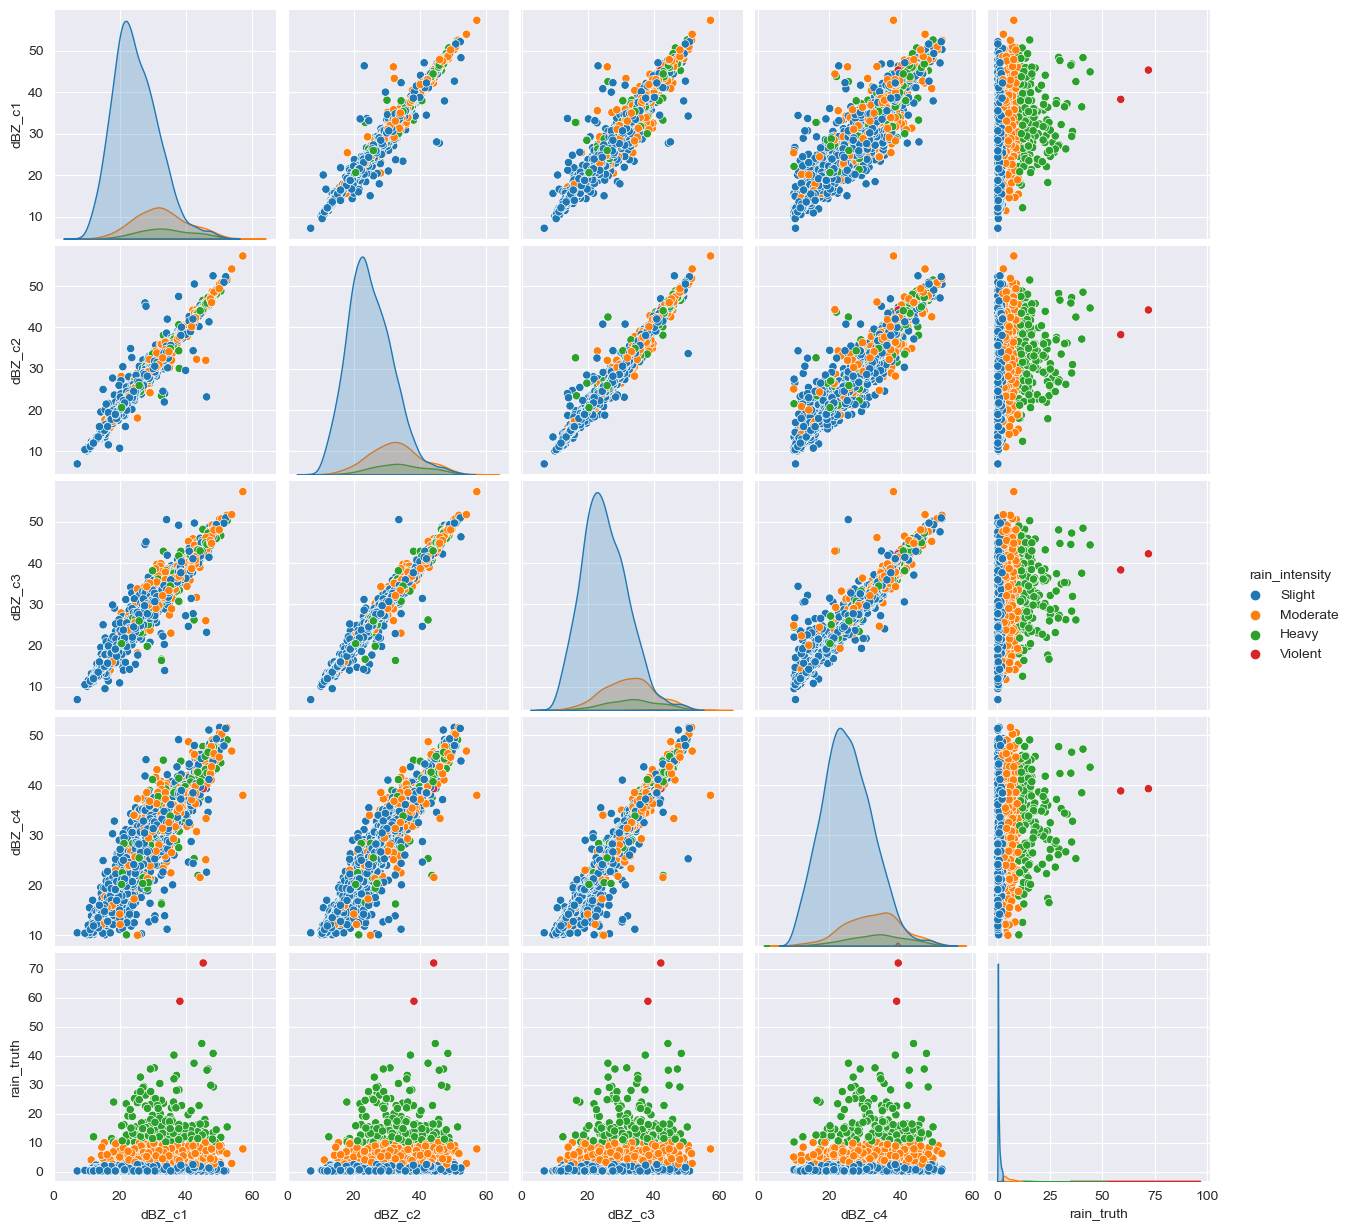

In [6]:
cols_to_plot = ['dBZ_c1', 'dBZ_c2', 'dBZ_c3', 'dBZ_c4', 'rain_truth','rain_intensity']
sns.set_style({'font.family':'Tahoma'})
#sns.set(font_scale=2.5)
sns.set_style('darkgrid')
pplot=sns.pairplot(df[cols_to_plot], hue='rain_intensity', hue_order=['Slight', 'Moderate', 'Heavy', 'Violent'])

### box plot

[Text(0.5, 0, 'Rain intensity WMO'), Text(0, 0.5, 'Cappi 1km (dBZ)')]

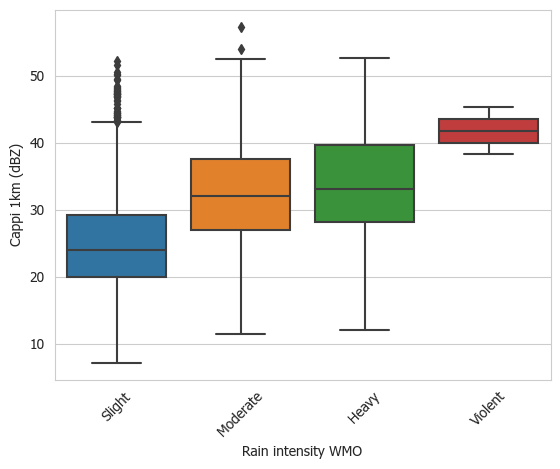

In [7]:
sns.set_style("whitegrid")   
sns.set_style({'font.family':'Tahoma'})
bbplot=sns.boxplot(x ='rain_intensity' , y = 'dBZ_c1', data = df, order=['Slight', 'Moderate', 'Heavy', 'Violent']) 
bbplot.set_xticklabels(bbplot.get_xticklabels(), rotation=45)
bbplot.set(xlabel='Rain intensity WMO',  ylabel='Cappi 1km (dBZ)')

[Text(0.5, 0, 'Rain intensity WMO'), Text(0, 0.5, 'Cappi 2km (dBZ)')]

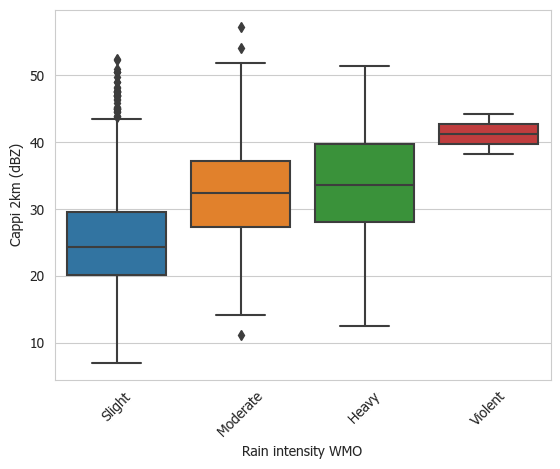

In [8]:
sns.set_style("whitegrid")   
sns.set_style({'font.family':'Tahoma'})
bbplot=sns.boxplot(x ='rain_intensity' , y = 'dBZ_c2', data = df, order=['Slight', 'Moderate', 'Heavy', 'Violent']) 
bbplot.set_xticklabels(bbplot.get_xticklabels(), rotation=45)
bbplot.set(xlabel='Rain intensity WMO',  ylabel='Cappi 2km (dBZ)')

# Machine Learning
https://www.educative.io/blog/machine-learning-regression-models-with-python

## Linear regression

In [9]:
# Step 1: Importing libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Step 2: Defining the columns and reading the DataFrame 
TargetVariable=['rain_truth']
Predictors=['dBZ_c1']
 
# Step 3: Seperating the data into features and labels
X=df[Predictors].values
y=df[TargetVariable].values

# Step 4: Dividing the dataset into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

# Step 5: Selecting the linear regression method from the scikit-learn library
model = LinearRegression().fit(X_train, y_train)

# Step 6: Validation
# Evaluating the trained model on training data
y_prediction = model.predict(X_train)
print("MAE on train data= " , metrics.mean_absolute_error(y_train, y_prediction))# Evaluating the trained model on test data
y_prediction = model.predict(X_test)
print("MAE on test data = " , metrics.mean_absolute_error(y_test, y_prediction))
r2 = metrics.r2_score(y_test, y_prediction)
print("R2:", r2)

MAE on train data=  2.159953404579955
MAE on test data =  2.07285219669325
R2: 0.128284022741612


## Multiple linear regression

In [10]:
# Step 1: Importing libraries 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Step 2: Defining the columns and reading the DataFrame 
TargetVariable=['rain_truth']
Predictors=['dBZ_c1']
 
# Step 3: Seperating the data into features and labels
X=df[Predictors].values
y=df[TargetVariable].values

# Step 4: Dividing the dataset into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

# Step 5: Selecting the linear regression method from the scikit-learn library
model = LinearRegression().fit(X_train, y_train)

# Step 6: Validation
# Evaluating the trained model on training data
y_prediction = model.predict(X_train)
print("MAE on train data= " , metrics.mean_absolute_error(y_train, y_prediction))
# Evaluating the trained model on test data
y_prediction = model.predict(X_test)
print("MAE on test data = " , metrics.mean_absolute_error(y_test, y_prediction))
r2 = metrics.r2_score(y_test, y_prediction)
print("R2:", r2)

MAE on train data=  2.159953404579955
MAE on test data =  2.07285219669325
R2: 0.128284022741612


## Polynomial regression

In [11]:
# Step 1: Importing libraries 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

# Step 2: Defining the columns and reading the DataFrame 
TargetVariable=['rain_truth']
Predictors=['dBZ_c1']
 
# Step 3: Seperating the data into features and labels
X=df[Predictors].values
y=df[TargetVariable].values

# Step 4: Generating polynomial features 
Z = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
# Dividing the dataset into test and train data
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=10)

# Step 5: Selecting the linear regression method from the scikit-learn library
model = LinearRegression().fit(X_train, y_train)

# Step 6: Validation
# Evaluating the trained model on training data
y_prediction = model.predict(X_train)
print("MAE on train data= " , metrics.mean_absolute_error(y_train, y_prediction))
# Evaluating our trained model on test data
y_prediction = model.predict(X_test)
print("MAE on test data = " , metrics.mean_absolute_error(y_test, y_prediction))
r2 = metrics.r2_score(y_test, y_prediction)
print("R2:", r2)

MAE on train data=  2.080029859822603
MAE on test data =  1.9773237796675622
R2: 0.13749046777158092


# implement model Deep learning ANN
DL ANN ต้องมีเรคคอร์ด>50K
https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/

In [12]:
TargetVariable=['rain_truth']
Predictors=['dBZ_c1', 'dBZ_c2', 'dBZ_c3', 'dBZ_c4']
 
X=df[Predictors].values
y=df[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# ต้องไปทำใน Colab เพราะติดตั้ง tensorflow + keras ได้ง่ายกว่า

(2513, 4)
(2513, 1)
(1078, 4)
(1078, 1)


# Next 
* ลองเล่น ML basic ของ microsoft https://github.com/MicrosoftDocs/ml-basics/blob/master/02%20-%20Regression.ipynb